In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df= pd.read_csv(r'movies.csv')

In [3]:
#look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#look for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [5]:
#Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Data Cleaning 
#Change data type of columns
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int)

In [7]:
df = df.dropna()
#create correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [8]:
#Sort highest to lowest gross
df.sort_values(by = ['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [9]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2339, dtype: object

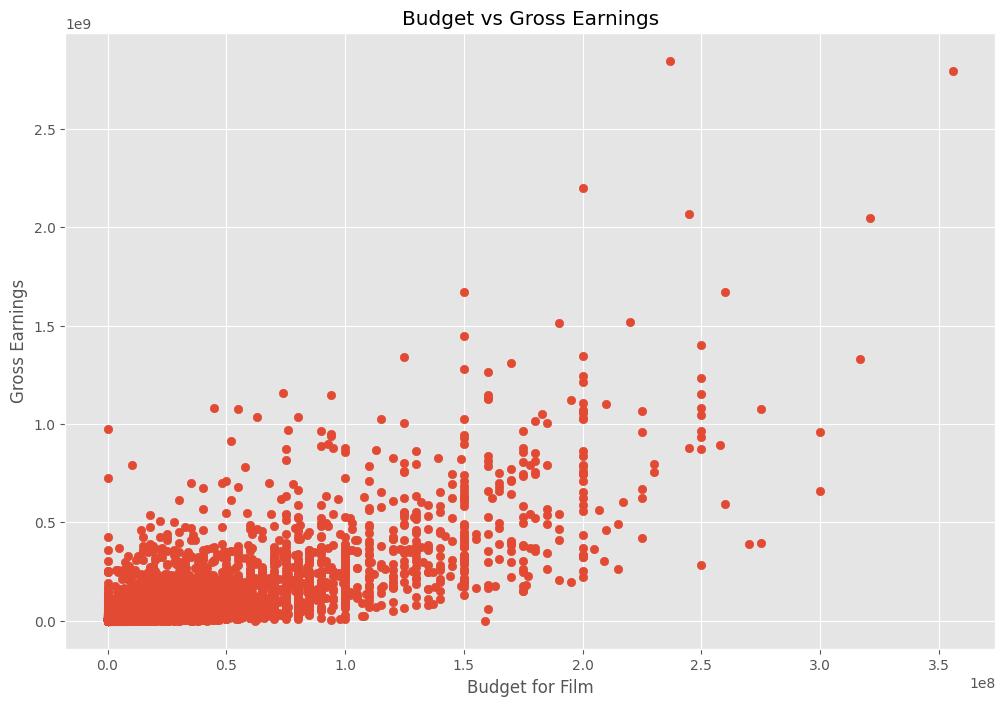

In [10]:
#what is correlated to gross revenue 
#budget and company might have a high correlation to gross revenue
#scatter plot with budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

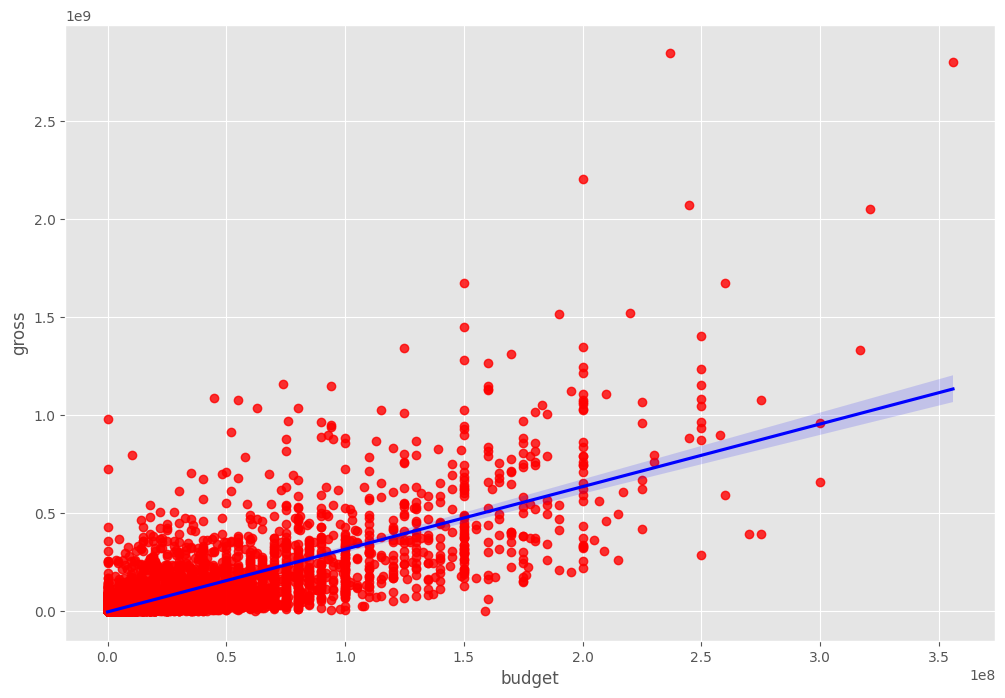

In [159]:
#plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [160]:
df.corr(method='pearson',numeric_only = True) #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676,0.997466
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574,0.109815
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366,0.222317
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042,0.305530
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942,0.257703
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000,0.120370
yearcorrect,0.997466,0.109815,0.222317,0.305530,0.257703,0.120370,1.000000


<Axes: xlabel='score', ylabel='gross'>

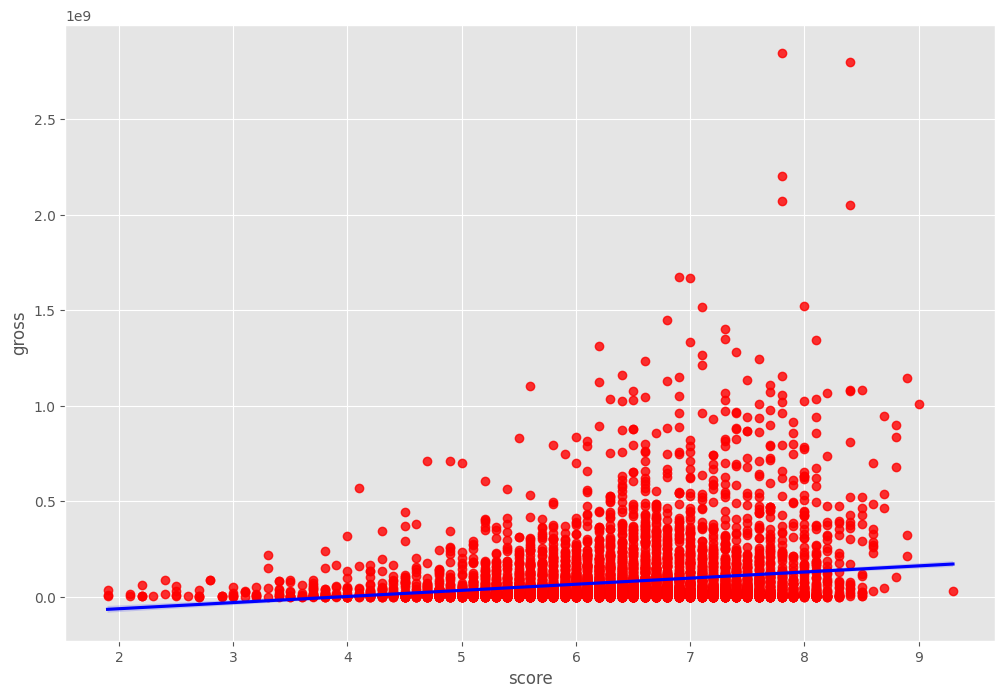

In [161]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

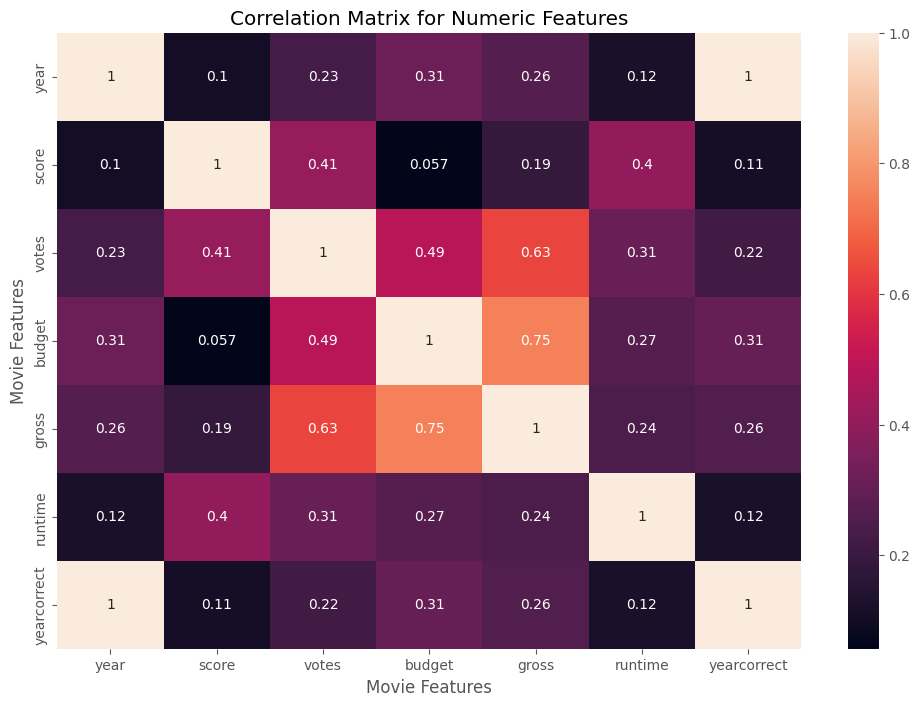

In [162]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [163]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [165]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6506,6,6,1980,1685,8.4,927000,2544,3958,1022,54,19000000,46998772,2273,146.0,1980
1,5498,6,1,1980,1472,5.8,65000,2233,1612,316,55,4500000,58853106,710,104.0,1980
2,5073,4,0,1980,1751,8.7,1200000,1093,2534,1708,55,18000000,538375067,1505,124.0,1980
3,282,4,4,1980,1472,7.7,221000,1279,1975,2197,55,3500000,83453539,1769,88.0,1980
4,1016,6,4,1980,1523,7.3,108000,1037,511,398,55,6000000,39846344,1736,98.0,1980


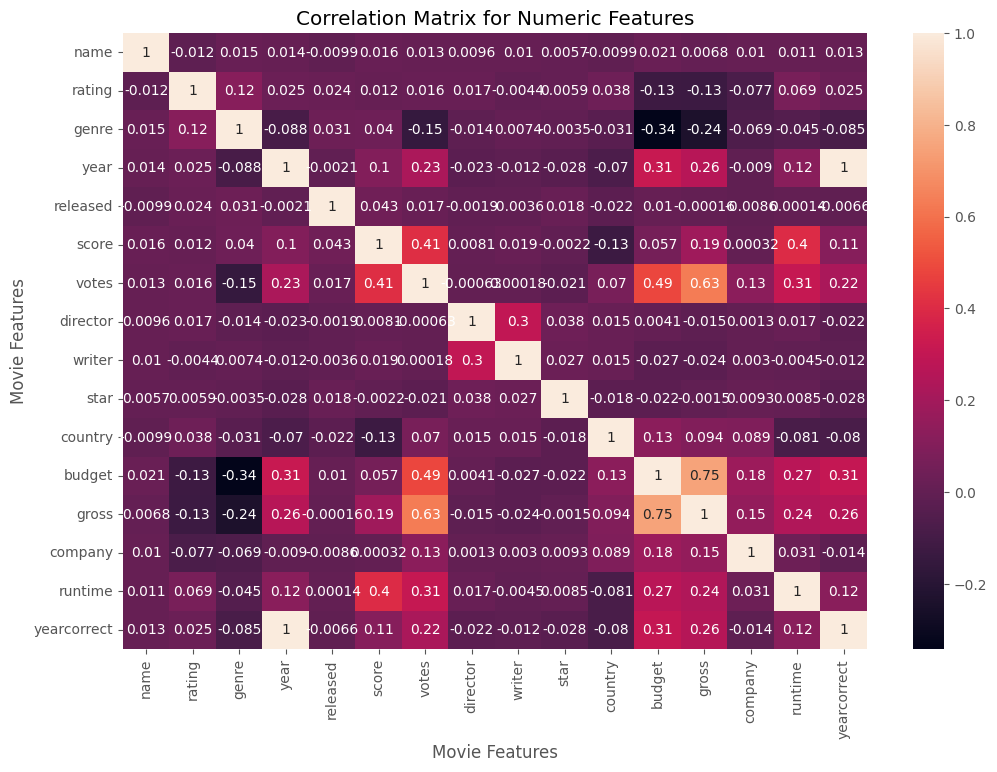

In [166]:
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [167]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.006817,0.010073,0.011151,0.012711
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128910,-0.076807,0.069089,0.025213
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.240903,-0.068678,-0.044631,-0.084559
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.314842,0.264716,-0.009026,0.120676,0.997466
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,-0.000164,-0.008570,0.000145,-0.006580
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.188259,0.000316,0.400574,0.109815
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.632987,0.129596,0.309366,0.222317
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.015027,0.001337,0.017386,-0.022096
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.023834,0.003035,-0.004526,-0.012013
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.001470,0.009317,0.008474,-0.028103


In [168]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.011924
             genre          0.015300
             year           0.013514
             released      -0.009906
             score          0.016181
             votes          0.013180
             director       0.009608
             writer         0.010217
             star           0.005685
             country       -0.009939
             budget         0.020825
             gross          0.006817
             company        0.010073
             runtime        0.011151
             yearcorrect    0.012711
rating       name          -0.011924
             rating         1.000000
             genre          0.117566
             year           0.024989
             released       0.024319
             score          0.011538
             votes          0.016086
             director       0.017205
             writer        -0.004387
             star           0.005905
             country        0.037738
 

In [169]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.342064
budget       genre         -0.342064
gross        genre         -0.240903
genre        gross         -0.240903
             votes         -0.148420
votes        genre         -0.148420
score        country       -0.130094
country      score         -0.130094
gross        rating        -0.128910
rating       gross         -0.128910
             budget        -0.126806
budget       rating        -0.126806
year         genre         -0.088172
genre        year          -0.088172
yearcorrect  genre         -0.084559
genre        yearcorrect   -0.084559
country      runtime       -0.081464
runtime      country       -0.081464
yearcorrect  country       -0.080397
country      yearcorrect   -0.080397
rating       company       -0.076807
company      rating        -0.076807
country      year          -0.070266
year         country       -0.070266
genre        company       -0.068678
company      genre         -0.068678
runtime      genre         -0.044631
g

In [170]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.632987
votes        gross          0.632987
gross        budget         0.750562
budget       gross          0.750562
year         yearcorrect    0.997466
yearcorrect  year           0.997466
director     director       1.000000
votes        votes          1.000000
released     released       1.000000
score        score          1.000000
rating       rating         1.000000
name         name           1.000000
genre        genre          1.000000
year         year           1.000000
budget       budget         1.000000
country      country        1.000000
writer       writer         1.000000
star         star           1.000000
company      company        1.000000
gross        gross          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and Budget have the highest correlation to gross earnings
#Company has low correlation
